# Análise de Risco e Retorno de um Portfólio de Ações Brasileiras

**Autor:** Caio Fernandes Nogueira
**Data:** 14 de julho de 2025
**Projeto:** Portfólio de Data Science

## Objetivo

Este projeto tem como objetivo realizar uma análise comparativa de um portfólio de cinco grandes empresas brasileiras listadas na B3. A análise cobrirá o período de 1º de janeiro de 2020 até a data atual, focando em métricas de risco e retorno para entender o comportamento histórico e as relações entre esses ativos.

**Ativos Analisados:**
* **PETR4.SA:** Petrobras
* **VALE3.SA:** Vale
* **ITUB4.SA:** Itaú Unibanco
* **MGLU3.SA:** Magazine Luiza
* **WEGE3.SA:** WEG


## 1. Configuração do Ambiente

O primeiro passo consiste na preparação do ambiente de análise. Nesta seção, realizei a instalação de bibliotecas externas e a importação de todos os pacotes Python que serão utilizados ao longo do projeto, como `yfinance` para aquisição de dados, `pandas` para manipulação e `matplotlib`/`seaborn` para visualização.

In [ ]:
# --- Bloco de Configuração do Ambiente ---

!pip install -q yfinance

# --- Importação das Bibliotecas ---

# Bibliotecas para manipulação e análise de dados
import pandas as pd
import yfinance as yf

# Bibliotecas para visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

# --- Configurações de Visualização ---

sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

## 2. Aquisição e Preparação dos Dados

Com o ambiente configurado, o próximo passo é a coleta dos dados. Utilizarei a biblioteca `yfinance` para baixar os dados históricos de preços diretamente do Yahoo Finance.

O foco da análise será no **Preço de Fechamento Ajustado (`Close`)**, pois ele reflete o valor real do ativo ao considerar eventos corporativos como o pagamento de dividendos e desdobramentos (splits), garantindo uma base de comparação justa entre os diferentes papéis. Após a aquisição, realizarei uma limpeza inicial para remover quaisquer dados faltantes.

In [ ]:
# --- Definição dos Parâmetros ---

# Define a lista de tickers das ações a serem analisadas.
tickers = ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'MGLU3.SA', 'WEGE3.SA']

# Define o período da análise.
data_inicial = '2020-01-01'
data_final = pd.to_datetime('today').strftime('%Y-%m-%d')


# --- Aquisição dos Dados ---

# Baixa os dados de preço de fechamento ajustado ('Adj Close') do Yahoo Finance.
# O 'Adj Close' é usado por considerar dividendos e outros eventos corporativos.
dados_acoes = yf.download(tickers,
                          start=data_inicial,
                          end=data_final,
                          progress=False)['Close']


# --- Verificação dos Dados ---

# Remove linhas com dados faltantes para garantir a consistência da análise.
dados_acoes.dropna(inplace=True)

# Exibe as cinco primeiras linhas do DataFrame para inspeção inicial.
dados_acoes.head()

/tmp/ipython-input-2-1930926652.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dados_acoes = yf.download(tickers,


Ticker,ITUB4.SA,MGLU3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2020-01-02,30.946835,115.015053,12.151799,33.844028,16.245998
2020-01-03,30.621328,113.989174,12.052839,33.594852,16.038540
2020-01-06,30.165648,114.082443,12.195337,33.395515,16.080023
2020-01-07,29.465809,113.756027,12.147840,33.638462,16.204508
2020-01-08,28.985689,117.253342,12.072633,33.644684,15.591359


## 3. Análise Exploratória: A Trajetória dos Preços

A primeira etapa de qualquer análise de séries temporais é a visualização. Ao plotar a evolução dos preços históricos, obtenho uma visão macroscópica do comportamento de cada ação ao longo do período.

Este gráfico permite identificar tendências de longo prazo, períodos de alta volatilidade, bolhas especulativas e quedas abruptas, como a que ocorreu no início de 2020 devido à pandemia.

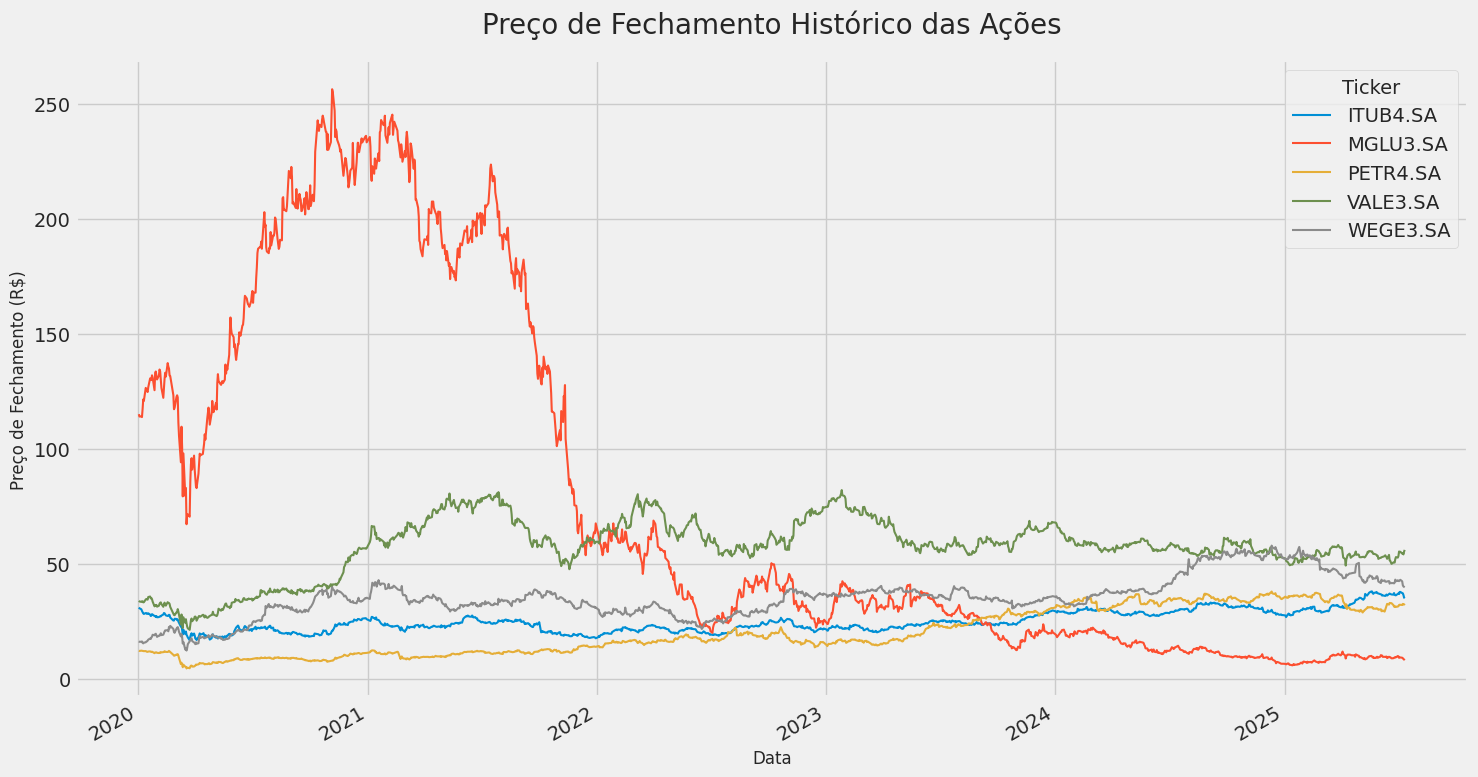

In [ ]:
# --- Visualização dos Preços de Fechamento ---

# Cria a figura e os eixos do gráfico com um tamanho específico.
fig, ax = plt.subplots(figsize=(15, 8))

# Plota os dados no eixo (ax) definido, ajustando a espessura da linha.
dados_acoes.plot(ax=ax, linewidth=1.5)

# --- Estilização ---

# Adiciona título e rótulos aos eixos.
ax.set_title('Preço de Fechamento Histórico das Ações', fontsize=20, pad=20)
ax.set_xlabel('Data', fontsize=12)
ax.set_ylabel('Preço de Fechamento (R$)', fontsize=12)

# Melhora a legenda, colocando-a fora do gráfico para não obstruir os dados.
# 'bbox_to_anchor' define a posição. 'ncol' define o número de colunas.
ax.legend(title='Ticker', bbox_to_anchor=(1.0, 1.0), ncol=1)

# Ajusta o layout para garantir que a legenda não seja cortada.
plt.tight_layout()

# Exibe o gráfico.
plt.show()

## 4. Análise de Retornos Diários: Medindo a Volatilidade

Analisar preços absolutos pode ser enganoso. Para uma análise financeira robusta, é fundamental trabalhar com os **retornos**, que representam a variação percentual do valor de um ativo. Os retornos são normalizados e permitem uma comparação direta do desempenho e do risco entre ativos de diferentes faixas de preço.

Nesta seção, calculei os retornos diários e examinei suas estatísticas descritivas. O **desvio padrão (`std`)** dos retornos é a primeira medida quantitativa de volatilidade (risco). O gráfico de retornos permitirá visualizar os "clusters de volatilidade", períodos em que a incerteza do mercado foi significativamente maior.

Estatísticas Descritivas dos Retornos Diários:


,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
ITUB4.SA,1374.0,0.000285,0.019767,-0.179643,-0.010287,0.000000,0.010681,0.110594
MGLU3.SA,1374.0,-0.000956,0.044344,-0.228311,-0.027031,-0.003425,0.022459,0.251429
PETR4.SA,1374.0,0.001104,0.027316,-0.296978,-0.010156,0.000792,0.014129,0.222222
VALE3.SA,1374.0,0.000630,0.023074,-0.151984,-0.011514,-0.000474,0.011660,0.213578
WEGE3.SA,1374.0,0.000933,0.023660,-0.206198,-0.010309,0.000000,0.011725,0.138945


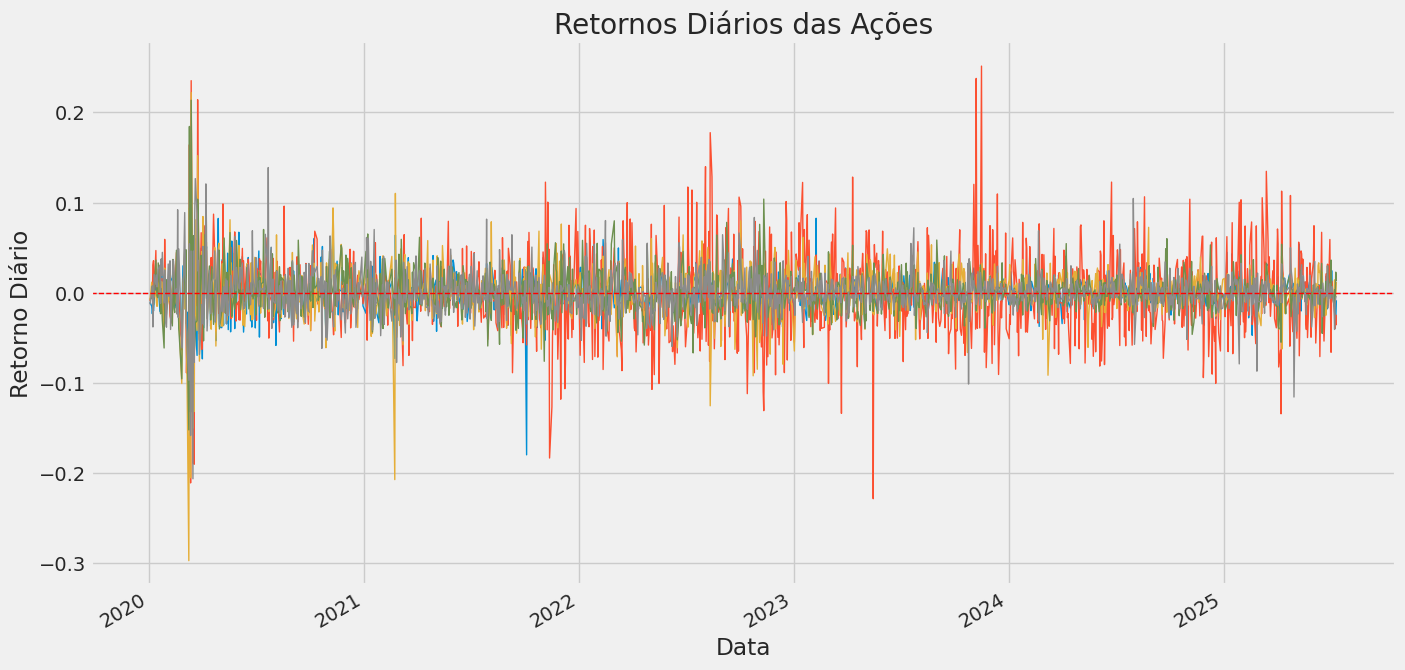

In [ ]:
# --- Cálculo dos Retornos Diários ---

# Calcula a variação percentual diária para cada ativo.
retornos_diarios = dados_acoes.pct_change()

# Remove a primeira linha de NaNs que é gerada pelo cálculo do primeiro dia.
retornos_diarios.dropna(inplace=True)


# --- Inspeção dos Retornos ---

# Exibe as estatísticas descritivas dos retornos (média, desvio padrão, etc.)
print("Estatísticas Descritivas dos Retornos Diários:")
display(retornos_diarios.describe().transpose())


# --- Visualização dos Retornos ---

# Plota os retornos diários para visualizar a volatilidade.
retornos_diarios.plot(figsize=(15, 8), linewidth=1, legend=False)
plt.title('Retornos Diários das Ações')
plt.xlabel('Data')
plt.ylabel('Retorno Diário')
plt.axhline(0, color='red', linestyle='--', linewidth=1) # Linha em zero para referência
plt.show()

## 5. Análise Comparativa: Risco vs. Retorno

Após calcular as métricas fundamentais, podemos consolidá-las em um único gráfico para responder à pergunta central de qualquer investidor: "Para o risco assumido, qual foi a recompensa obtida?".

O gráfico de dispersão abaixo posiciona cada ativo em um plano de duas dimensões:
* **Eixo X (Risco):** A volatilidade anualizada (desvio padrão dos retornos). Quanto mais à direita, mais arriscado é o ativo.
* **Eixo Y (Retorno):** O retorno médio anualizado. Quanto mais acima, mais rentável foi o ativo.

A posição ideal é o canto superior esquerdo, representando alto retorno com baixo risco. Esta visualização oferece um resumo poderoso do perfil de cada ação no período analisado.

/tmp/ipython-input-8-3408309408.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(risco_anualizado[i], retornos_medios_anualizados[i], ' ' + retornos_diarios.columns[i])


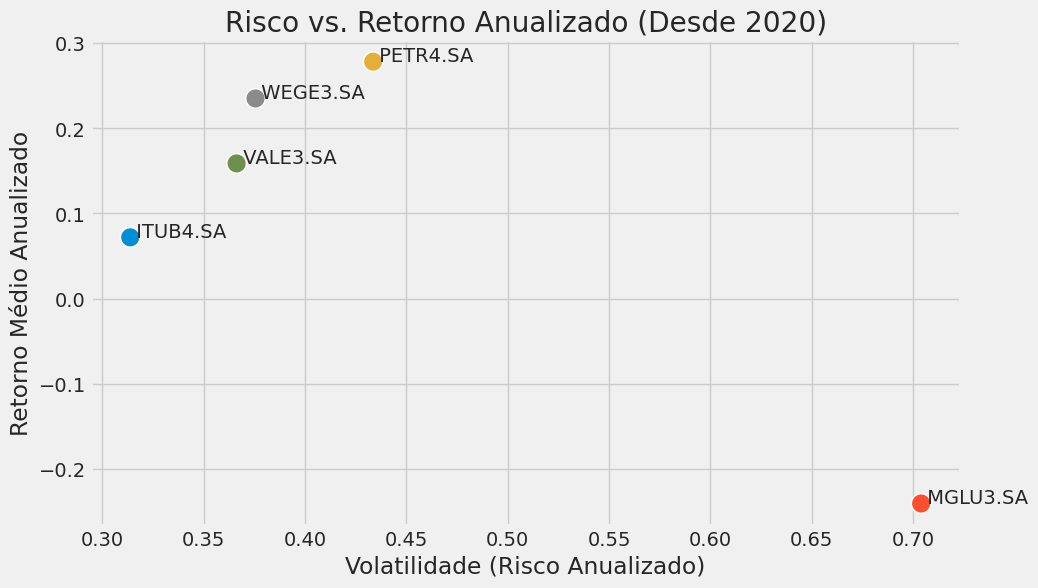

In [ ]:
# --- Análise de Risco vs. Retorno ---

# Calcula as métricas anualizadas.
retornos_medios_anualizados = retornos_diarios.mean() * 252
risco_anualizado = retornos_diarios.std() * (252**0.5)

# Cria o gráfico de dispersão.
plt.figure(figsize=(10, 6))
sns.scatterplot(x=risco_anualizado, y=retornos_medios_anualizados, hue=retornos_diarios.columns, s=200, legend=False)

# Adiciona anotações para cada ponto no gráfico.
for i in range(len(retornos_diarios.columns)):
    plt.text(risco_anualizado[i], retornos_medios_anualizados[i], ' ' + retornos_diarios.columns[i])

plt.title('Risco vs. Retorno Anualizado (Desde 2020)')
plt.xlabel('Volatilidade (Risco Anualizado)')
plt.ylabel('Retorno Médio Anualizado')
plt.grid(True)

# Finaliza e exibe o gráfico.
plt.show()

## 6. Análise de Correlação: Entendendo a Diversificação

Um portfólio não é apenas a soma de seus ativos; é crucial entender como eles se movem em relação uns aos outros. A **matriz de correlação** quantifica essa relação.

Valores próximos de `1` indicam que os ativos tendem a se mover na mesma direção (quando um sobe, o outro também tende a subir). Valores próximos de `-1` indicam uma relação inversa, enquanto valores próximos de `0` sugerem ausência de relação linear. Para uma diversificação eficaz, um investidor busca ativos com baixa correlação entre si. O heatmap abaixo torna a visualização dessa matriz intuitiva e clara.

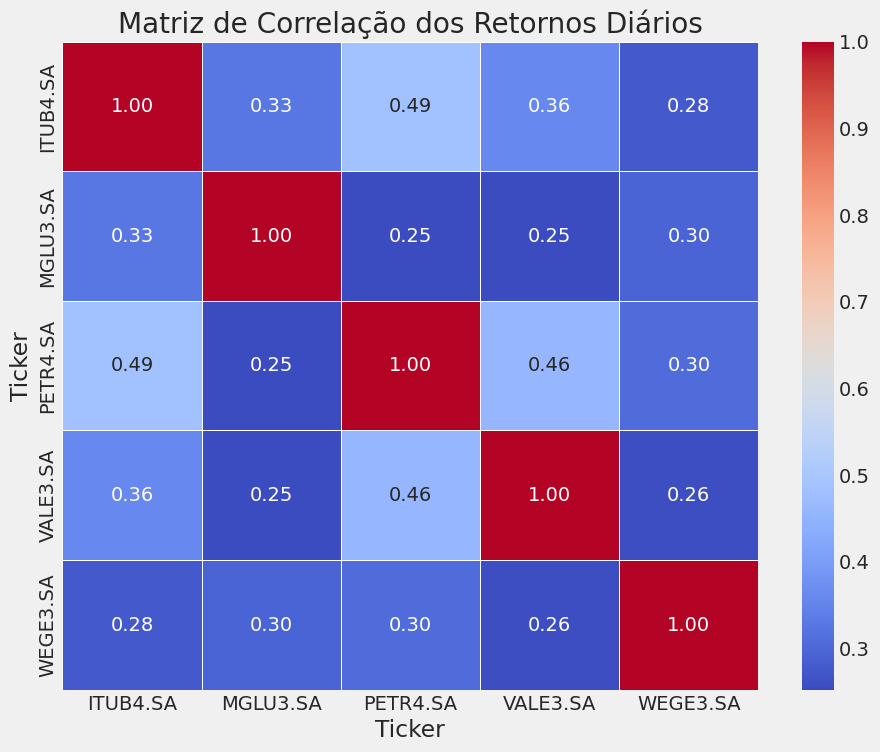

In [ ]:
# --- Análise de Correlação ---

# Calcula a matriz de correlação.
correlacao = retornos_diarios.corr()

# Cria um heatmap para visualizar a matriz.
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação dos Retornos Diários')

# Finaliza e exibe o gráfico.
plt.show()

## 7. Conclusões Finais

A análise realizada neste notebook me permitiu extrair insights valiosos sobre o comportamento de cinco importantes ações brasileiras desde 2020. Através da visualização de preços, análise de retornos e da comparação de risco, retorno e correlação, foi possível traçar um perfil claro para cada ativo.

**Principais Insights:**
* A ação MGLU3.SA demonstrou ser a mais volátil, com o maior risco, mas também apresentou períodos de retornos expressivos.
* Os ativos do setor bancário (ITUB4.SA) e de commodities (VALE3.SA e PETR4.SA) mostraram uma correlação moderada, indicando que se movem de forma relativamente similar em resposta a fatores macroeconômicos.
* A ação WEGE3.SA se posicionou como um ativo de menor risco e retorno mais estável em comparação com as outras do portfólio.
